## 程式說明

本程式將用該網站 https://archive.ics.uci.edu/ml/datasets/spambase 提供的垃圾郵件資料集，透過scikit-learn的機器學習套件建立垃圾郵件的分類模型。

### 匯入套件

In [1]:
import numpy as np
import pandas as pd

### 讀取垃圾郵件資料集

In [2]:
spambase_df = pd.read_csv('spambase.data', header = None) 
spambase_df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


### 取得資料集的欄位名稱，並和垃圾郵件資料集合併

In [3]:
with open('spambase.names', 'r') as f:
    spambase_name_file = f.read().splitlines()

In [4]:
spambase_columns = []
for row in spambase_name_file:
    if 'continuous.' in row:
        spambase_columns.append(row.split(' ')[0][:-1])

spambase_columns.append('is_spam')
print(spambase_columns)

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capita

In [5]:
spambase_df.columns = spambase_columns
spambase_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


### 初步查看資料集

In [6]:
spambase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [7]:
spambase_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [8]:
spambase_df['is_spam'].value_counts()

0    2788
1    1813
Name: is_spam, dtype: int64

In [9]:
2788 / (2788 + 1813)

0.6059552271245382

初步查看資料集的發現：
* 所有欄位都是non-null，不需要補缺值
* is_spam為0和1的比例大約是3:2，還算是可接受的範圍內，不需要特別做resampling

### 生成訓練集和測試集

In [10]:
from sklearn.model_selection import train_test_split
X = spambase_df.drop(['is_spam'], axis=1)
y = spambase_df['is_spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
print(X_train.shape, X_test.shape)

(3220, 57) (1381, 57)


### 特徵縮放

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 建立分類模型

#### 1. 羅吉斯回歸

In [13]:
from sklearn.linear_model import LogisticRegression
logisticRegModel = LogisticRegression().fit(X_train, y_train)

In [14]:
train_accuracy = logisticRegModel.score(X_train, y_train)
test_accuracy = logisticRegModel.score(X_test, y_test)
print(f"accuracy of training set: {train_accuracy:.4f}")
print(f"accuracy of testing set: {test_accuracy:.4f}")

accuracy of training set: 0.9286
accuracy of testing set: 0.9261


#### 2. KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)

In [16]:
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print(f"accuracy of training set: {train_accuracy:.4f}")
print(f"accuracy of testing set: {test_accuracy:.4f}")

accuracy of training set: 0.9339
accuracy of testing set: 0.9080


#### 3. 決策樹

In [17]:
# 根據訓練集決定樹的最大深度
from sklearn import tree
prev_acc = 10e-5
for i in range(10):
    dt = tree.DecisionTreeClassifier(max_depth = i + 1)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    print(f"max_depth: {i + 1}")
    print(f"accuracy of training set: {train_accuracy:.4f}")
    print(f"進步幅度：{(train_accuracy - prev_acc) / train_accuracy:.4f}")
    print()
    prev_acc = train_accuracy

max_depth: 1
accuracy of training set: 0.7988
進步幅度：0.9999

max_depth: 2
accuracy of training set: 0.8637
進步幅度：0.0752

max_depth: 3
accuracy of training set: 0.8978
進步幅度：0.0380

max_depth: 4
accuracy of training set: 0.9093
進步幅度：0.0126

max_depth: 5
accuracy of training set: 0.9239
進步幅度：0.0158

max_depth: 6
accuracy of training set: 0.9363
進步幅度：0.0133

max_depth: 7
accuracy of training set: 0.9478
進步幅度：0.0121

max_depth: 8
accuracy of training set: 0.9556
進步幅度：0.0081

max_depth: 9
accuracy of training set: 0.9609
進步幅度：0.0055

max_depth: 10
accuracy of training set: 0.9658
進步幅度：0.0051



最大深度為8的時後預測訓練集的進步幅度已經不到1%，因此最大深度選定為7。

In [18]:
max_depth = 7
dt = tree.DecisionTreeClassifier(max_depth = max_depth)
dt.fit(X_train, y_train)
train_accuracy = dt.score(X_train, y_train)
test_accuracy = dt.score(X_test, y_test)
print(f"accuracy of training set: {train_accuracy:.4f}")
print(f"accuracy of testing set: {test_accuracy:.4f}")

accuracy of training set: 0.9478
accuracy of testing set: 0.9124


#### 4. 隨機森林

In [19]:
# 根據訓練集決定森林的最大深度
from sklearn.ensemble import RandomForestClassifier
prev_acc = 10e-5
for i in range(10):
    rm = RandomForestClassifier(max_depth=i + 1, random_state=0)
    rm.fit(X_train, y_train)
    train_accuracy = rm.score(X_train, y_train)
    print(f"max_depth: {i + 1}")
    print(f"accuracy of training set: {train_accuracy:.4f}")
    print(f"進步幅度：{(train_accuracy - prev_acc) / train_accuracy:.4f}")
    print()
    prev_acc = train_accuracy

max_depth: 1
accuracy of training set: 0.8354
進步幅度：0.9999

max_depth: 2
accuracy of training set: 0.8835
進步幅度：0.0545

max_depth: 3
accuracy of training set: 0.9078
進步幅度：0.0267

max_depth: 4
accuracy of training set: 0.9242
進步幅度：0.0178

max_depth: 5
accuracy of training set: 0.9345
進步幅度：0.0110

max_depth: 6
accuracy of training set: 0.9416
進步幅度：0.0076

max_depth: 7
accuracy of training set: 0.9531
進步幅度：0.0121

max_depth: 8
accuracy of training set: 0.9593
進步幅度：0.0065

max_depth: 9
accuracy of training set: 0.9643
進步幅度：0.0052

max_depth: 10
accuracy of training set: 0.9693
進步幅度：0.0051



最大深度為8的時後預測訓練集的進步幅度已經不到1%，因此最大深度選定為7。

In [20]:
max_depth = 7
rm = RandomForestClassifier(max_depth=max_depth, random_state=0)
rm.fit(X_train, y_train)
train_accuracy = rm.score(X_train, y_train)
test_accuracy = rm.score(X_test, y_test)
print(f"accuracy of training set: {train_accuracy:.4f}")
print(f"accuracy of testing set: {test_accuracy:.4f}")

accuracy of training set: 0.9531
accuracy of testing set: 0.9377


根據上面四個模型的結果，目前表現最好的分類模型是**隨機森林**，測試集的準確度高達93.8%。

### 模型是否能再表現得更好？ - 特徵工程

In [21]:
X_new = X.copy()

#### 新增變數之間的交互作用項(包含自身的平方項)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_new  = poly.fit_transform(X_new)
X_new.shape

(4601, 1711)

#### 生成訓練集和測試集

In [23]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.3, random_state=1)

#### 特徵縮放

In [24]:
scaler_new = StandardScaler()
scaler_new.fit(X_train_new)
X_train_new = scaler_new.transform(X_train_new)
X_test_new = scaler_new.transform(X_test_new)

#### PCA降維

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
pca.fit_transform(X_train_new)

print(pca.explained_variance_ratio_)

[5.46089212e-02 2.86473862e-02 2.09693040e-02 ... 2.59672298e-34
 1.32578087e-34 5.13229394e-35]


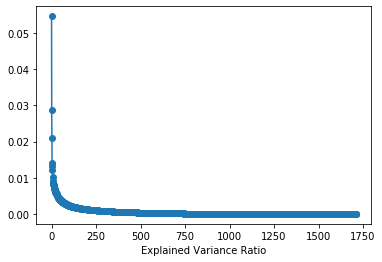

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt 
def plotData(plt, data):
    x = [p[0] for p in data]
    y = [p[1] for p in data]
    plt.plot(x, y, '-o')

plotData(plt, list(zip(range(X_train_new.shape[1]), pca.explained_variance_ratio_)))
plt.xlabel("PC")
plt.xlabel("Explained Variance Ratio")
plt.show()

In [28]:
sum(pca.explained_variance_ratio_[:250])

0.7711313815929405

根據上圖，前250個主成分可以解釋原始資料快要8成的變異，因此將維度從1700多降成250

In [29]:
pca = PCA(n_components=250)
pca.fit(X_train_new)
X_train_new = pca.transform(X_train_new)
X_test_new = pca.transform(X_test_new)

### 用新的資料跑剛剛表現最好的隨機森林

In [30]:
# 根據訓練集決定森林的最大深度
prev_acc = 10e-5
for i in range(10):
    rm = RandomForestClassifier(max_depth=i + 1, random_state=0)
    rm.fit(X_train_new, y_train_new)
    train_accuracy = rm.score(X_train_new, y_train_new)
    print(f"max_depth: {i + 1}")
    print(f"accuracy of training set: {train_accuracy:.4f}")
    print(f"進步幅度：{(train_accuracy - prev_acc) / train_accuracy:.4f}")
    print()
    prev_acc = train_accuracy

max_depth: 1
accuracy of training set: 0.7460
進步幅度：0.9999

max_depth: 2
accuracy of training set: 0.8516
進步幅度：0.1240

max_depth: 3
accuracy of training set: 0.8832
進步幅度：0.0359

max_depth: 4
accuracy of training set: 0.9022
進步幅度：0.0210

max_depth: 5
accuracy of training set: 0.9180
進步幅度：0.0173

max_depth: 6
accuracy of training set: 0.9320
進步幅度：0.0150

max_depth: 7
accuracy of training set: 0.9463
進步幅度：0.0151

max_depth: 8
accuracy of training set: 0.9593
進步幅度：0.0136

max_depth: 9
accuracy of training set: 0.9699
進步幅度：0.0109

max_depth: 10
accuracy of training set: 0.9801
進步幅度：0.0105



最大深度為10的時後預測訓練集的進步幅度還有超過1%，因此最大深度選定為10。

In [31]:
max_depth = 10
rm = RandomForestClassifier(max_depth=max_depth, random_state=0)
rm.fit(X_train_new, y_train_new)
train_accuracy = rm.score(X_train_new, y_train_new)
test_accuracy = rm.score(X_test_new, y_test_new)
print(f"accuracy of training set: {train_accuracy:.4f}")
print(f"accuracy of testing set: {test_accuracy:.4f}")

accuracy of training set: 0.9801
accuracy of testing set: 0.9319


新增變數之間的交互作用項並做降維之後，訓練集的準確度上升至98.1%，然而測試集的卻下降至93.2%(原本為93.8%)，代表該模型已經有輕微的overfitting現象了，也許之後要嘗試不同的特徵工程方法。